# day 0 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
sys.path.append("../../lxmls-toolkit/")
import matplotlib.pyplot as plt

# Introduction to gradient descent

We will start motivating the use of the gradient of a function. Then we will see in detail how to compute a numerical approximation of the gradient of a function at a given point. This numerical approximation ** should only be used to check whether our exact gradient computation was correct or not**. Why? Essentially for performance reasons. When approximating numerically the gradient of a function at a given point we need to evaluate the function in two points and divide by a scalar. This essentially means that we will double the amount of time needed to compute the gradient. If evaluating a function (such as a neural net) requires a non trivial amount of computation doing the approximation might be a terrible idea. 


#### Overview of gradient descent/ascent

Gradient descent is an optimization method used to find a local minimum or maximum of a differentiable function $f$. The method takes an initial initial point $p^0$ (guess of the solution) and then takes a step in the direction given by the gradient of $f$ in $p^0$, $\nabla f (p^0)$.

The step has a certain length $\eta$.  From this new point $p^1 := p^0 + \eta \nabla f (p^0) $ another evaluation of the gradient is done in order to find a new direction and a new point $p^2$. The process is repeated until  $\|f(p^k) - f(p^{k+1})\| \leq\epsilon$ for a certain $k$ and $\epsilon$. That is until the difference of the  evaluation of a point and the following one is less than a pre specified threshold $\epsilon$.

Notice that the gradient of a function at a given point gives the direction of maximum growth of the function at that point. Therefore minus the  gradient gives the direction of maximum decrease.
Based on the previous comments the update of a point $p^k$ to $p^{k+1}$, for any $k$, is 

- $p^{k+1} = p^k + \eta \nabla f (p^k) $   if the goal of the algorithm is to find a local maximum of $f$.


- $p^{k+1} = p^k - \eta \nabla f (p^k) $   if the goal of the algorithm is to find a local minimum of $f$.


# Computing numerical approximation of derivatives

Before we implement the numerical approximation of a gradient it might be helpful to implement the numerical computation of a simple derivative.


Let's suppose that we have a function $f$ that takes as input a real number and outputs a real number, $f: \Re \rightarrow \Re$. For example: 

$$f(x) = x^2$$

When solving an minimization problem our objective will be to find the argument $x$ that minimizes this function. Notice that for maximization, the same theory can be applied to the function $-f(x)$ insted to $f(x)$. In oreder to solve this minimization problem we need the concept of **derivative**.

#### Derivative of a function at a given point 
The derivative of $f$ of a variable $x$, denoted by $f'(x)$ or $\frac{\mathrm{d}f}{\mathrm{d}x}$,  is a measure of the rate at which the value of the function changes with respect to the change of the variable. It is defined as the following limit:

$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

The derivative specifies how to scale a small change in the input in order to obtain the corresponding change in the output: 

$$ f(x + h) \approx f(x) + h f'(x)$$

The limit as $h$ approaches zero it represents the **slope of the tangent line** to $(x, f(x))$ (if it exists). That means that for any value of $h$ that is not zero the result of the formula is only an approximation.

#### Visualizing the  difference between the true derivative at a point and the approximation

In [2]:
# This is the function that we will investigate:
def func(x):
    return x**2

# This is the point where we choose to take the gradient: [-1, 1]
x = -1.0
x_fx = [x, func(x)]
print("Point (x, f(x)): {}".format(x_fx))

# we know that the true gradient is f'(x)=2*x
def true_gradient(x):
    return 2*x

true_grad = true_gradient(x)  # 2.0
print("True grad: {}".format(true_grad))

Point (x, f(x)): [-1.0, 1.0]
True grad: -2.0


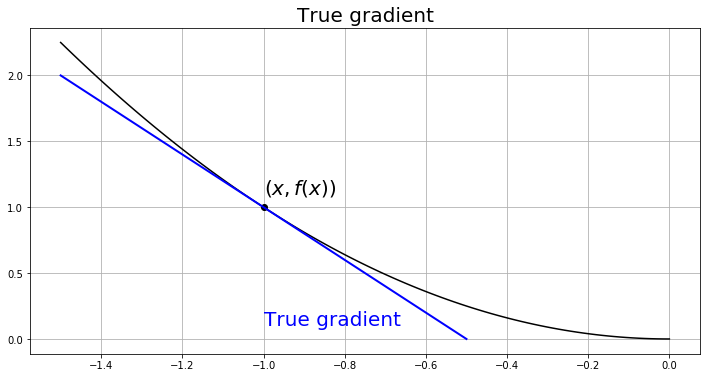

In [3]:
# Now let's plot the true gradient.

def plot_true_gradient():
    # we plot a line along a series of points x
    # linspace gives us 100 points between -1.5 and 0.0
    x_values = np.linspace(-1.5, 0.0, 100)

    # this plots our function f(x)
    plt.plot(x_values, func(x_values), 'k-')

    # this is our point of interest
    plt.plot([x],[func(x)],'ko')
    plt.text(-1.0, 1.1, '$(x,f(x))$', size=20, color="k")

    # this plots the true gradient:
    # we plot a line between two points around x
    # and we use the true gradient to get a y value for them, using:
    # y = func(x) + true_grad * step
    h = 0.5
    plt.plot([x - h, x + h],[func(x) - true_grad * h, func(x) + true_grad * h], 'b-', lw=2)
    plt.text(-1, 0.1, 'True gradient', size=20, color="b")

    plt.gcf().set_size_inches((12,6))
    plt.title("True gradient", size=20)
    plt.grid()
    
plot_true_gradient()
plt.show()

In [4]:
# we can approximate the gradient by taking a small step h.
# for demonstration, we take a pretty large step!
h = 0.5
approx_grad = (func(x + h) - func(x)) / h
print("Approximate grad: {}".format(approx_grad))

Approximate grad: -1.5


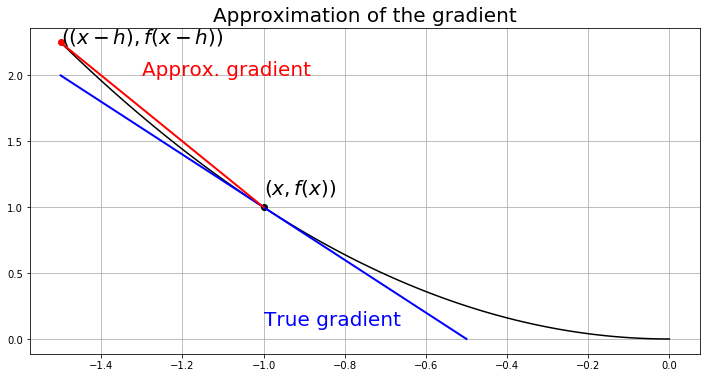

In [5]:
# Now let's plot the approximate gradient too.

def plot_approx_gradient():

    plot_true_gradient()

    # this is the point with which we approximate the gradient
    h = 0.5
    plt.plot([x - h],[func(x - h)],'ro')
    plt.text(x - h, func(x - h), '$((x-h),f(x-h))$', size=20, color="k")
    plt.plot([x - h, x], [func(x - h), func(x)],'r-',lw=2)

    plt.text(-1.3, 2.0, 'Approx. gradient', size=20, color="r")
    plt.title("Approximation of the gradient", size=20)
    
plot_approx_gradient()
plt.show()

### A more general gradient checking example

In [6]:
def function(x):
    return x**2

def grad(x):
    return 2*x

def num_grad(function, x, h = 0.0001):
    return (function(x + h) - function(x))/h

def check_grad(grad, numerical_grad, epsilon=0.0001):
    if np.linalg.norm(grad - numerical_grad) <= epsilon:
        print("grad seems well implemented")
    else:
        print("grad seems wrong!")
        
point = 10
g = grad(point)
print("exact gradient evaluated at {} takes value {}".format(point, g))

num_g = num_grad(function, point)
print("numerical gradient evaluated at {} takes value {}".format(point, num_g))

check_grad(grad(point), num_grad(function, point))

exact gradient evaluated at 10 takes value 20
numerical gradient evaluated at 10 takes value 20.0000999999
grad seems well implemented


# Computing numerical approximation of gradients

#### Toy example of gradient checking

- Let us consider $f(x) = x_1^2 + 10  x_2 + 10 $
- Compute the gradient of f
- Evaluate the gradient of f 
- Check that the true gradient is close to the numerical gradient in several points

In [7]:
def f(x):
    return x[0]**2 + 10*x[1]  + 10

def grad_f(x):
    return [2**x[0], 10]

import scipy
from scipy import optimize
point = np.array([2,3])

print("gradient of f in point is", grad_f(point))
print("distance between numerical and real gradient is ", scipy.optimize.check_grad(f, grad_f, point))

('gradient of f in point is', [4, 10])
('distance between numerical and real gradient is ', 0.0)


#### Toy example gradient checking function with parameters

In [8]:
import scipy
from scipy import optimize

In [9]:
def func(x,params=10):
    return x[0]**2 - 0.5 * x[1]**3 *params

def grad(x,params=10):
    return [2 * x[0], -1.5 * x[1]**2*params]

In [10]:
scipy.optimize.check_grad(func, grad, [1.5, -1.5])

2.384185791015625e-07

In [11]:
def grad_f(x):
    return [2**x[0], 10]

In [12]:
scipy.optimize.check_grad(f, grad_f, np.array([2,3]))

0.0

## Exercise 0.14

Consider the linear regression problem (ordinary least squares) on the Galton dataset, with a single response variable
$$
y = \textbf{x}^T\textbf{w} + \epsilon
$$

This is a general problem where

- $\textbf{x}$ is a $D$ dimensional vector
- $y$ is a scalar


The linear regression problem is, given a set 
$$
\{y^{(m)}\}_{m=1}^M
$$

of samples of $y$ and the corresponding $\textbf{x}^{(m)}$ vectors, estimate $\textbf{w}$ to minimise the sum of the $\epsilon$ variables. 

Traditionally this is solved analytically to obtain a closed form solution. Although this is not the way in which it should be computed in this exercise, linear algebra packages have an optimised solver, e.g. numpy.linalg.lstsq.

We can code the prediction of our linear model using a dot product already implemented
in ```np.dot```. In order to do it we can append a column full of ones. 

#### Notes about the implementation for the galton dataset
- We want to model son heights from father heights.


- We will denote the data that has the mentioned appended column as ```ones_X```
    - ```ones_X.shape``` should have shape ```(928, 2)```


- ```ones_x``` will denote a single row of ```ones_X``` which is a $D+1$ dimensional vector
  - Notice that ```ones_x``` can be any for of ```ones_X```, for example the k'th row ```
  ones_X[k]```.
  - It is very important to understand the difference between  ```
  ones_X[k]``` and ```ones_X[k:k+1]```. 
      - ```ones_X[k]``` has ndim 1
      - ```ones_X[k:k+1]``` has ndim 2
   
   
- $y$ is a scalar




In [13]:
import lxmls
import lxmls.readers.galton as galton

In [14]:
galton_data = galton.load()

In [15]:
#father_height = galton_data["father_height"]
#son_height = galton_data["son_height"]

father_height = galton_data[:,0].reshape((len(galton_data),1))
son_height = galton_data[:,1].reshape((len(galton_data),1))

In [16]:
father_height.shape, son_height.shape

((928, 1), (928, 1))

#### Append the column full of ones for the bias term

In [17]:
ones_X = np.hstack((np.ones((father_height.shape[0],1)), father_height))

In [18]:
ones_X.shape

(928, 2)

In [19]:
ones_X

array([[  1. ,  70.5],
       [  1. ,  68.5],
       [  1. ,  65.5],
       ..., 
       [  1. ,  69.5],
       [  1. ,  69.5],
       [  1. ,  69.5]])

In [20]:
Y = son_height

### 0.14


##### 0. Complete the function that produces the predictions for a given observation and a set of weights $w_j$ 
        
<pre>
def predict(X,w):
    ## WRITE HERE
    return ##something
</pre>

#### Predicting using the linear model


Let us assume we have a dataset with

- $M$ datapoints (number of rows).
- $D$ features (number of columns)

In order to do this exercise we will add a column full of ones at position 0 and get a $M \times (D+1)$.

The predict function will return the prediction of the linear model given

- An input which can be 
    - A single $ (D+1) \times 1$ row vector
    - A matrix of the form $batch \times (D+1)$ where $batch$ is the number of rows in the matrix.
    
- A vector of weights of size $D$

Notice that we have created a new column full of ones  to take into account the bias term of the regressor.




In [21]:
ones_X

array([[  1. ,  70.5],
       [  1. ,  68.5],
       [  1. ,  65.5],
       ..., 
       [  1. ,  69.5],
       [  1. ,  69.5],
       [  1. ,  69.5]])

In [22]:
np.random.seed(123)
w = np.random.random((2,1))
np.dot(ones_X[0:3],w)

array([[ 20.8692923 ],
       [ 20.29701363],
       [ 19.43859562]])

In [23]:
def predict(X,w):
    return np.dot(X,w)

In [24]:
### test
y_hat_3  = np.array([[ 20.8692923 ],
                     [ 20.29701363],
                     [ 19.43859562]])

np.random.seed(123)
w = np.random.random((2,1))

if np.linalg.norm(y_hat_3 - predict(ones_X[0:3],w))<0.00001:
    print("\ntest passed: your predict function seems to be OK ")


test passed: your predict function seems to be OK 


##### 1. Complete the function that compute the cost function for a given set of data and weights of the linear model 


In [25]:
def compute_cost(Y, Y_hat):
    cost = 0
    num_observations = Y.shape[0]
    
    for y,y_hat in zip(Y, Y_hat):
        cost += (y - y_hat)**2
        
    # vectorized done
    # np.mean( (Y_hat - Y)**2, axis=0)
    return  cost/num_observations

In [26]:
np.random.seed(123)
w = np.random.random((2,1))
Y_hat = predict(ones_X, w) 

In [27]:
### test
np.random.seed(123)
w = np.random.random((2,1))

Y_hat = predict(ones_X, w) 

if np.linalg.norm( compute_cost(Y_hat, Y)- 2294.68652697)<0.00001:
    print("\ntest passed: your predict function seems to be OK ")


test passed: your predict function seems to be OK 


##### 2. Derive the partial derivative of the error with respecto to a weight $w_j$ 

In [28]:
def compute_partial_error_wrt_j(X, Y, weights, j ):
    return np.mean(2 * (predict(X,weights) - Y) * X[:,[j]], axis=0)

In [29]:
def compute_grad(X, Y, weights):
    if X.ndim == 1:
        X = np.array([X])
        
    # assume rows in X are datapoints
    num_features = X.shape[1]
    num_examples = X.shape[0]
    
    #grad_acum = np.zeros(num_features)
    #for x,y in zip(X, Y):
    #    for j in range(num_features):
    #        grad_acum[j] += compute_partial_error_wrt_j(x, y, w, j)
    #grad  = (1./ num_examples) * grad_acum
    
    grad = np.zeros(num_features)
    for j in range(num_features):
        #X_j = X[:,j].reshape((num_examples,1)
        #grad[j] = np.mean(2*(predict(X,w) - Y) * X_j, axis=0)[0]
        grad[j] = compute_partial_error_wrt_j(X, Y, weights, j )
        
    return grad

## Optimizing weights using gradient descent

In [30]:
def predict(X,w):
    return np.dot(X,w)

def compute_partial_error_wrt_j(X, Y, weights, j ):
    return np.mean(2 * (predict(X,weights) - Y) * X[:,[j]], axis=0)

#def compute_cost(Y, Y_hat):
#    return np.mean( (Y_hat - Y)**2, axis=0)

In [31]:
def compute_cost(x, y, w):
    """
    MSE
    """
    predictions = np.dot(x, w)
    return np.mean((predictions-y)**2)

In [32]:
def compute_gradient(X, Y, weights):
    if X.ndim == 1:
        X = np.array([X])
        
    # assume rows in X are datapoints
    num_features = X.shape[1]

    grad = np.zeros((num_features,1))
    for j in range(num_features):
        grad[j] = compute_partial_error_wrt_j(X, Y, weights, j )
        
    return grad

### Gradient checking

We want to ensure that the computation of the cost with respect to the weights is correct. 

We will build a function that 

- Takes as input a function ``func`` and a point where we will evaluate the gradient of ``func``.
- Computes an approximation of the gradient of a given function


In [33]:
def num_grad_w(func, w, x, y ,e = 1e-5):
    """
    Compute the gradient of the func with respect to w.
    The function returns a gradient vector of the same size as w
    """
    dim = w.shape[0]
    grads = []
    perturbation_vector  = np.zeros(w.shape)
    grads = np.zeros(perturbation_vector.shape)
    
    for i in range(dim):
        # Perturbate the current dimension
        perturbation_vector[i] = e
        
        # Compute the slope: (point+epsilon - point-epsilon)/2epsilon
        err_a = func(x, y, w + perturbation_vector)
        err_b = func(x, y, w - perturbation_vector)
        partial_i = (err_a - err_b) / (2*e)
        perturbation_vector[i] = 0
        grads[i] = partial_i
        
    return grads

In [34]:
num_features = ones_X.shape[1] 
np.random.seed(123)
weights = np.random.random((num_features,1))

## grad using exact formula
exact_gradient = compute_gradient(ones_X, son_height, weights)
exact_gradient

array([[  -95.69268136],
       [-6538.89239773]])

In [35]:
num_grad = num_grad_w(compute_cost, weights, x=ones_X, y=son_height)
num_grad

array([[  -95.69268136],
       [-6538.89239773]])

## Generalize the gradient checking code

In [36]:
def num_grad_w(func, w, x, y ,e = 1e-5):
    """
    Compute the gradient of the func with respect to w.
    The function returns a gradient vector of the same size as w
    """    
    dim = w.shape[0]
    grads = []
    perturbation_vector  = np.zeros(w.shape)
    grads = np.zeros(perturbation_vector.shape)
    
    for i in range(dim):
        # Perturbate the current dimension
        perturbation_vector[i] = e
        
        # Compute the slope: (point+epsilon - point-epsilon)/2epsilon
        err_a = func(x, y, w + perturbation_vector)
        err_b = func(x, y, w - perturbation_vector)
        partial_i = (err_a - err_b) / (2*e)
        perturbation_vector[i] = 0
        grads[i] = partial_i
        
    return grads

In [37]:
num_features = ones_X.shape[1] 
np.random.seed(123)
weights = np.random.random((num_features,1))

## grad using exact formula
exact_gradient = compute_gradient(ones_X, son_height, weights)
exact_gradient

array([[  -95.69268136],
       [-6538.89239773]])

In [38]:
num_grad = num_grad_w(compute_cost, weights, x=ones_X, y=son_height)
num_grad

array([[  -95.69268136],
       [-6538.89239773]])

### Gradient descent

In [39]:
# given w_j
cost_evolution = []
def gradient_descent(num_iterations, X, Y, learning_rate=0.0001):
    # add column full of ones to X this allow us to take into 
    # account an offset (or bias) term for the linear model
    num_features = X.shape[1] 
    weights = np.random.random((num_features,1))
    
    for it in range(num_iterations):
        weights = weights - learning_rate * compute_gradient(X, Y, weights)
        Y_hat = predict(X,weights)


        #cost = compute_cost(Y,Y_hat)
        cost = compute_cost(X,Y,weights)
        cost_evolution.append(cost)
        #import pdb;pdb.set_trace()


        sys.stdout.write("\rw_hat " + str(float(weights[0]))[0:8] +" "+ str(float(weights[1]))[0:8]+ \
                         " cost iter " +  str(it) + " is: " + str(cost)[0:5] )
        sys.stdout.flush()
        
    w_hat = weights
    return w_hat

In [40]:
def compute_cost(x, y, w):
    """
    MSE
    """
    predictions = np.dot(x, w)
    return np.mean((predictions-y)**2)

In [41]:
# set initial weights
np.random.seed(123)
weights = np.random.random((2,1))/10
weights[0] = 0
w_hat = gradient_descent(300, ones_X, Y, learning_rate = 0.00001)

w_hat 0.233412 0.993129 cost iter 299 is: 5.384

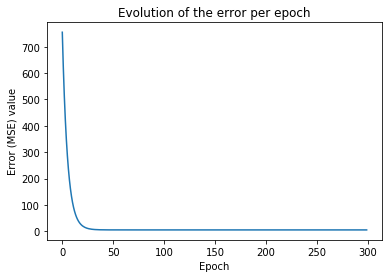

In [42]:
# Plot the value of the cost function per iteration
plt.plot(cost_evolution)
plt.title("Evolution of the error per epoch")
plt.ylabel("Error (MSE) value")
plt.xlabel("Epoch")

In [43]:
w_hat_lstsq = np.linalg.lstsq(a=ones_X, b= son_height)[0]

In [44]:
w_hat_lstsq

array([[ 23.94153018],
       [  0.64629058]])

In [45]:
w_hat

array([[ 0.23341221],
       [ 0.9931292 ]])

### Plotting the regression

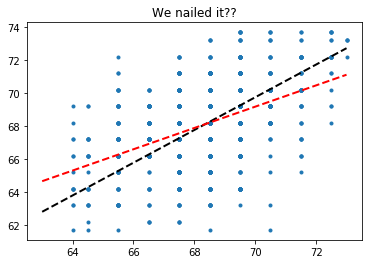

In [46]:
plt.plot(father_height,son_height, ".")
plt.title("We nailed it??")
maxim, minim = int(np.max(father_height)), int(np.min(father_height))
xvals = [vec for vec in np.array(range(minim-1, maxim+1)) ]

# Gradient descent solution
yvals = [ w_hat[1]  * xval + w_hat[0] for xval in xvals]

# solution from closed form
yvals2 = [ w_hat_lstsq[1]  * xval + w_hat_lstsq[0] for xval in xvals]

plt.plot(xvals, yvals, '--', c='k',linewidth=2)
plt.plot(xvals, yvals2, '--', c='r',linewidth=2)

### Add jitter to  see points that are "superposed"

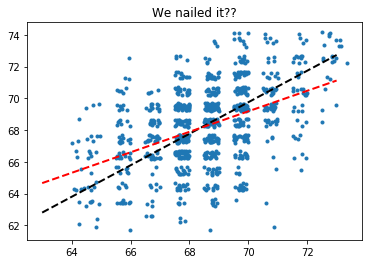

In [47]:
plt.plot(father_height+np.random.random(father_height.shape)/2.,
         son_height+np.random.random(father_height.shape)/2., ".")
plt.title("We nailed it??")
maxim, minim = int(np.max(father_height)), int(np.min(father_height))
xvals = [vec for vec in np.array(range(minim-1, maxim+1)) ]

# Gradient descent solution
yvals = [ w_hat[1]  * xval + w_hat[0] for xval in xvals]

# solution from closed form
yvals2 = [ w_hat_lstsq[1]  * xval + w_hat_lstsq[0] for xval in xvals]

plt.plot(xvals, yvals, '--', c='k',linewidth=2)
plt.plot(xvals, yvals2, '--', c='r',linewidth=2)